In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from stoneforge.petrophysics import shale_volume, porosity, water_saturation
from stoneforge.datasets import dataload
from stoneforge.vis import wellplot

In [2]:
IK1,unik1 = dataload.ik1()
IK1

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
0,81.0,-999.0,-999.0,-999.0,-999.0,79.7502,-999.0,-999.0,-999.0,-999.0,-999.0
1,81.5,-999.0,-999.0,-999.0,-999.0,79.9790,-999.0,-999.0,-999.0,-999.0,-999.0
2,82.0,-999.0,-999.0,-999.0,-999.0,79.8643,-999.0,-999.0,-999.0,-999.0,-999.0
3,82.5,-999.0,-999.0,-999.0,-999.0,79.9446,-999.0,-999.0,-999.0,-999.0,-999.0
4,83.0,-999.0,-999.0,-999.0,-999.0,80.1459,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
30796,15479.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30797,15479.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30798,15480.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
30799,15480.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
print(unik1)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'GR': 'GAPI', 'CALI': 'IN', 'RHOB': 'G/C3', 'DRHO': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


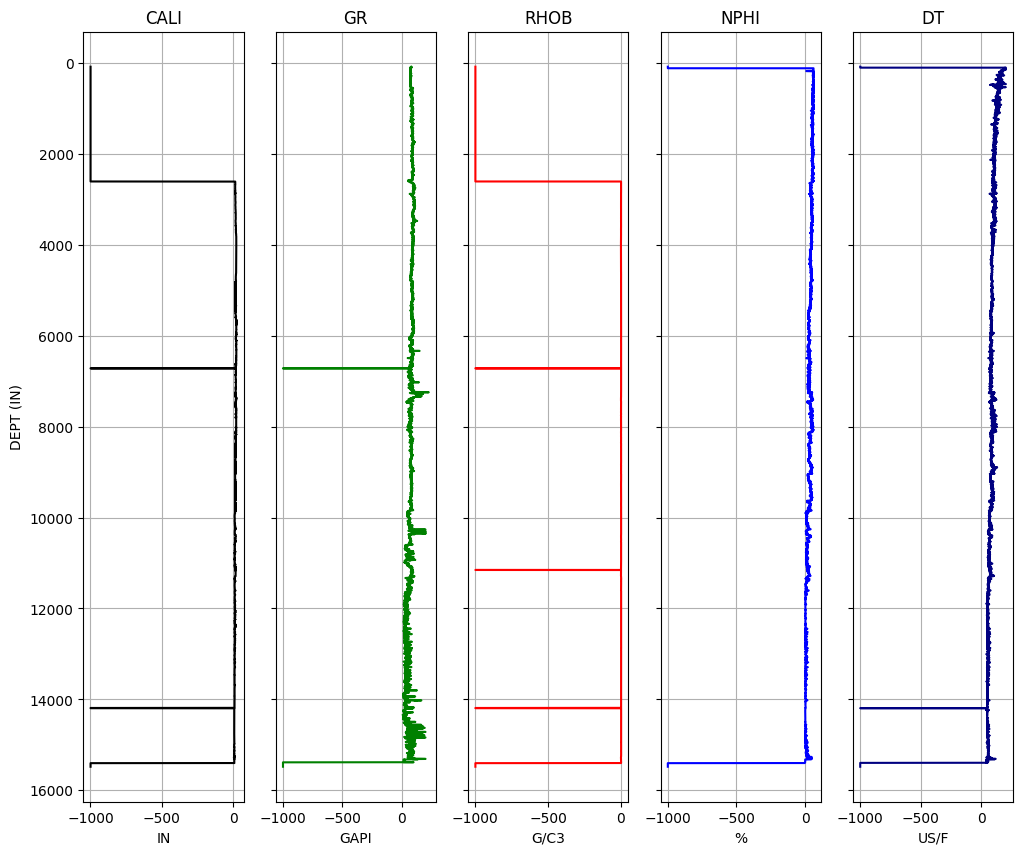

In [7]:
curves = ["CALI","GR","RHOB","NPHI","DT"]
units = []
for c in curves:
    units.append(unik1[c])

color = ["k","g","r","b","navy"]

wellplot(IK1,"DEPT",curves, color, units)

In [8]:
# Removing specific values
# OBS: you can use "df.dropna(inplace=True)" to remove all np.nan values

IK1_c = IK1[~IK1.isin([-999.0]).any(axis=1)]
IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


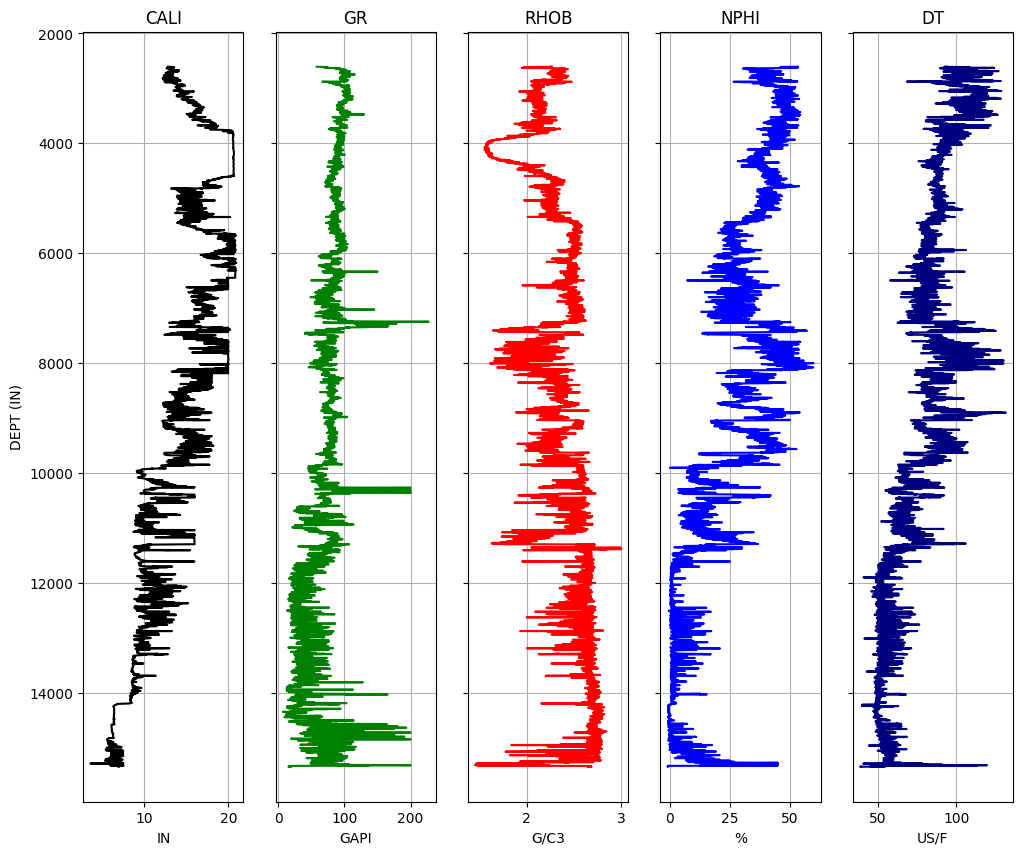

In [9]:
wellplot(IK1_c,"DEPT",curves, color, units)

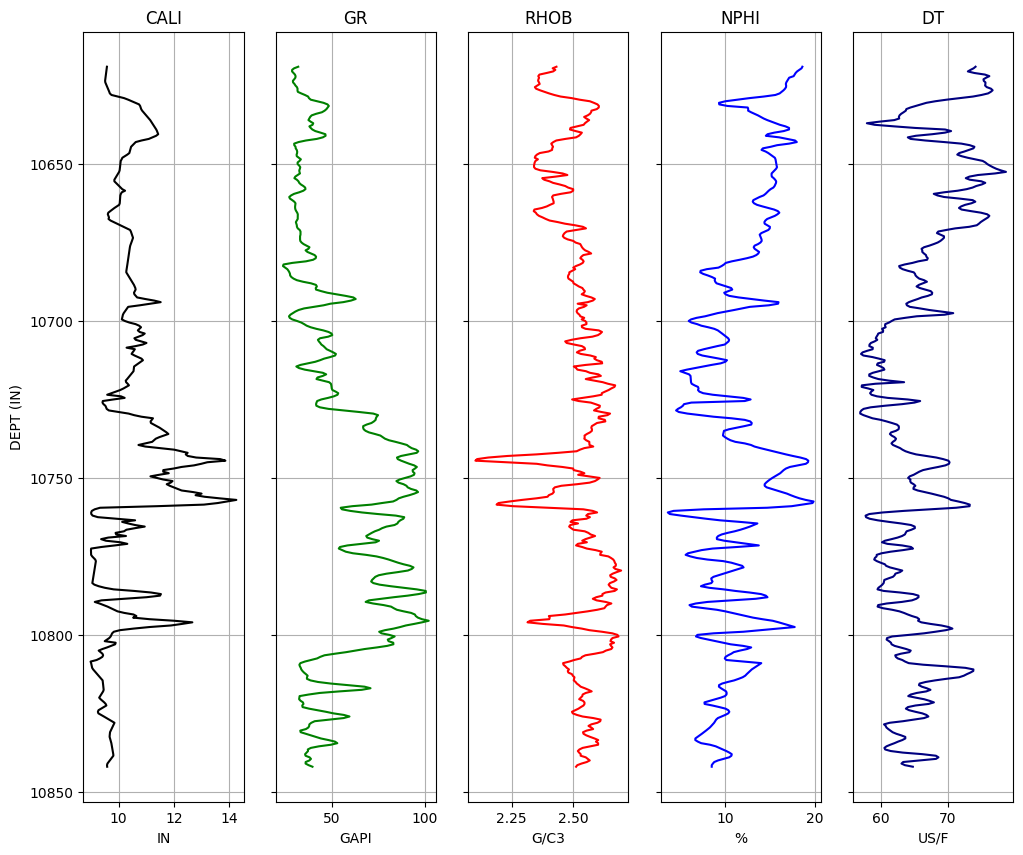

In [10]:
# Taking specific value in depth for analysis
LEDGE_SANDSTONE = IK1_c[IK1_c['DEPT'].between(10619, 10842)]
wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [11]:
# Preparing data for VSH
GR = np.array(LEDGE_SANDSTONE["GR"])
GR_min = np.percentile(GR, 10)
GR_max = np.percentile(GR, 90)
print("GR_min:",GR_min,"|GR_max:",GR_max)

LEDGE_SANDSTONE["VSH_larionov"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov")
LEDGE_SANDSTONE["VSH_larionov_old"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov_old")
LEDGE_SANDSTONE["VSH_clavier"] = shale_volume.vshale(GR, GR_min, GR_max, "clavier")

GR_min: 30.78398 |GR_max: 88.65426000000001


C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\2623164332.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["VSH_larionov"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov")
C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\2623164332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["VSH_larionov_old"] = shale_volume.vshale(GR, GR_min, GR_max, "larionov_old")
C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\2623164332.py:9: SettingWithCopyWarning: 
A value is trying

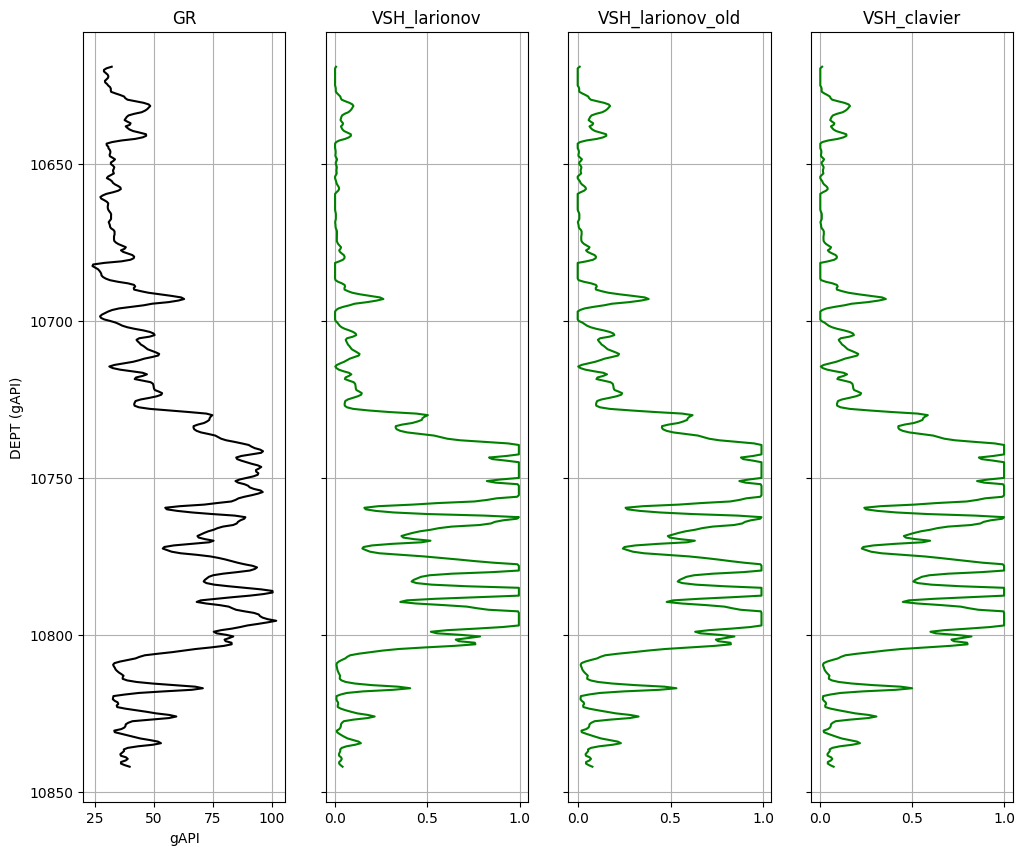

In [12]:
curves = ["GR","VSH_larionov","VSH_larionov_old","VSH_clavier"]
units = ["gAPI","","",""]
color = ["k","g","g","g"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [13]:
# Preparing data for porosity

NPHI = np.array(LEDGE_SANDSTONE["NPHI"])/100.
RHOB = np.array(LEDGE_SANDSTONE["RHOB"])

LEDGE_SANDSTONE["PHI_density"] = porosity.porosity(method = "density", rhob = RHOB, rhom = 2.65, rhof = 1.10)
LEDGE_SANDSTONE["PHI_neutron"] = porosity.porosity("neutron", nphi = NPHI, vsh = np.array(LEDGE_SANDSTONE["VSH_larionov_old"]), nphi_sh = 0.17)

d:\github\stoneforge\stoneforge\petrophysics\porosity.py:64: UserWarning: rhom must be greater than rhof and rhob
  warnings.warn(UserWarning("rhom must be greater than rhof and rhob"))
C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\1667530303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["PHI_density"] = porosity.porosity(method = "density", rhob = RHOB, rhom = 2.65, rhof = 1.10)
d:\github\stoneforge\stoneforge\petrophysics\porosity.py:107: UserWarning: phin must be a positive value
  warnings.warn(UserWarning("phin must be a positive value"))
C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\1667530303.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

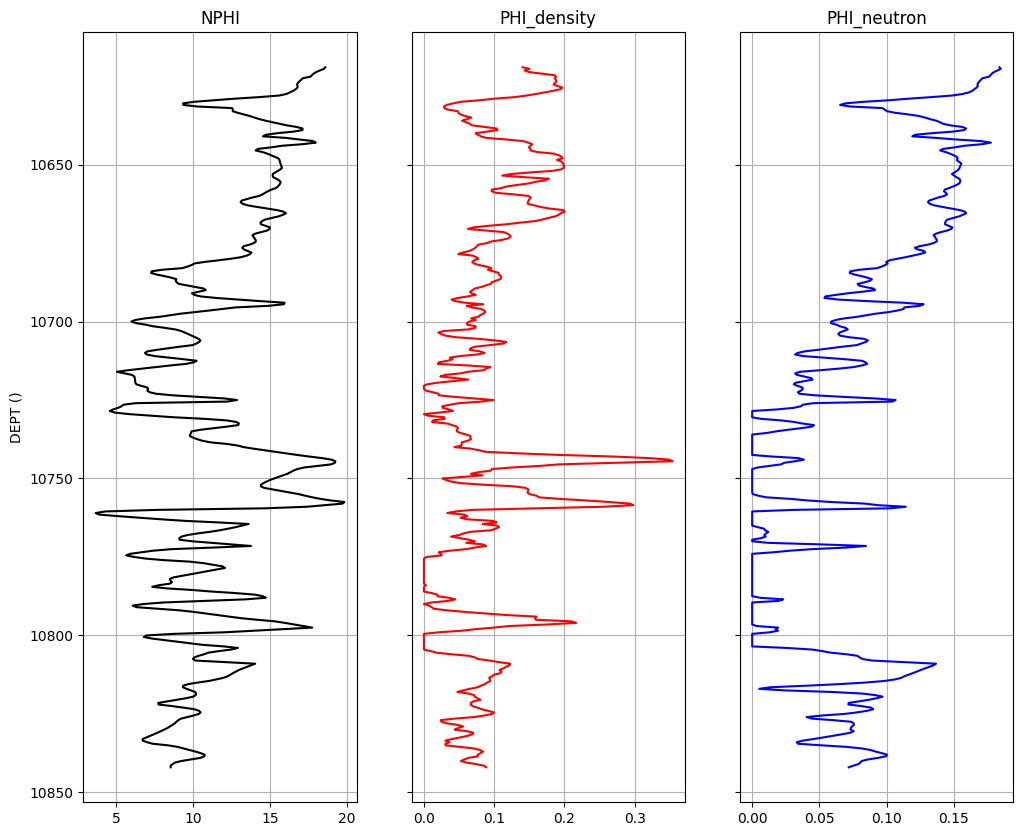

In [14]:
curves = ["NPHI","PHI_density","PHI_neutron"]
units = ["","",""]
color = ["k","r","b"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)

In [15]:
LEDGE_SANDSTONE["WS"] = water_saturation.water_saturation(method="archie", rw=0.02, rt=LEDGE_SANDSTONE["ILD"], phi=LEDGE_SANDSTONE["PHI_density"], a=1, m=2 , n=2)

d:\github\stoneforge\stoneforge\petrophysics\water_saturation.py:44: UserWarning: saturation of water must be a value between 0 and 1
  warnings.warn(UserWarning("saturation of water must be a value between 0 and 1"))
C:\Users\mmram\AppData\Local\Temp\ipykernel_8592\1270274385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LEDGE_SANDSTONE["WS"] = water_saturation.water_saturation(method="archie", rw=0.02, rt=LEDGE_SANDSTONE["ILD"], phi=LEDGE_SANDSTONE["PHI_density"], a=1, m=2 , n=2)


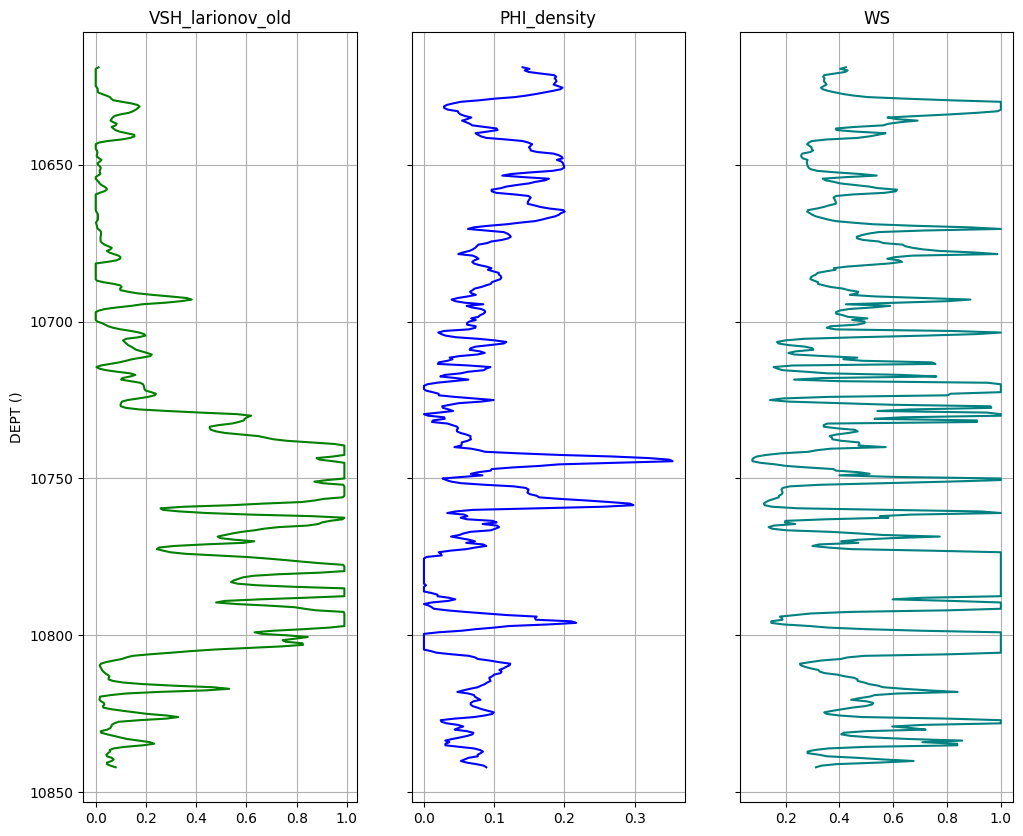

In [16]:
curves = ["VSH_larionov_old","PHI_density","WS"]
units = ["","",""]
color = ["g","b","teal"]

wellplot(LEDGE_SANDSTONE,"DEPT",curves, color, units)